<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project3-PotentialTalents/WordEmbedding_5steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work in 2 process:
1. Rank: The fit column is empty, and we should calculate the similarity of the search term against the job titles of the candidates using cosine similarity.
2. Design and Learn how to rank: We need labels for the 2nd project.
- Pick a few candidates and manually overwrite their fit score (cosine_similarity). I should pick one among the word embedding methods I've gon through so far.
- Train a learning to rank model in particular, 'RankNet' in PyTorch (<- they have many examples on github in code). Rank Net use pair-wise ranking, I need to transform fit score by selecting to candidates randomly and comparing their fit scores if one of the fit score is larger than the pair, it is transformed as 1. if it's smaller than the other pair, the label becomes 0, indicating that one candidate should be ranked above the other candidates.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Necessary Package Installation

In [ ]:
!pip install wordcloud
!pip install nltk
!pip install gensim
!pip install sentence-transformers

### Open CSV

In [ ]:
# open data
import numpy as np
import pandas as pd

# text data vectorization and word embedding
from sklearn.feature_extraction.text import TfidfVectorizer
# from sentence_transformers import SentenceTransfomrer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/data.csv')
df

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


#### EDA

In [ ]:
df.drop_duplicates()  # nothing
df.isnull().sum()   # nothing

,0
id,0
job_title,0
location,0
connection,0
fit,104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [ ]:
df.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [ ]:
# checking the values
print(df['job_title'].value_counts())

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [ ]:
print("Unique job titles:", df['job_title'].nunique())
print("Unique locations:", df['location'].nunique())

Unique job titles: 52
Unique locations: 41


In [ ]:
np.array(df['job_title'])

array(['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       'Native English Teacher at EPIK (English Program in Korea)',
       'Aspiring Human Resources Professional',
       'People Development Coordinator at Ryan',
       'Advisory Board Member at Celal Bayar University',
       'Aspiring Human Resources Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'HR Senior Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'Seeking Human Resources HRIS and Generalist Positions',
       'Student at Chapman University',
       'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
       'Human Resources Coordinator at InterContinental Buckhead Atlanta',
       '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       '2019 C.T. Bau

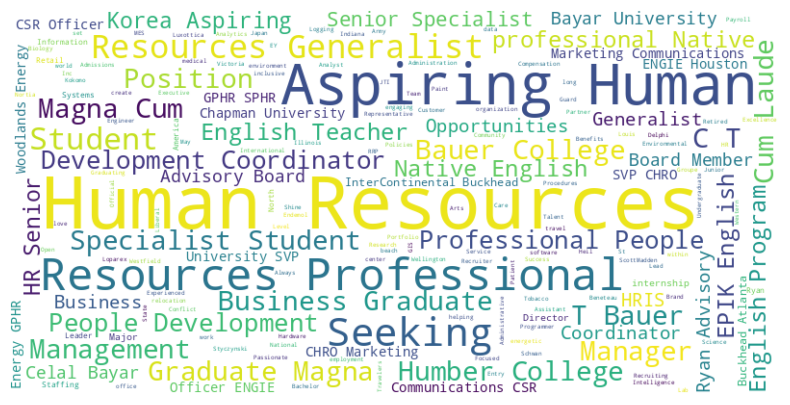

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# converting df['job_title'] into a single text
text1 = " ".join(df['job_title'].dropna().astype(str))  # 결측치 제거 및 문자열 변환

# WordCloud generate
wordcloud = WordCloud(width = 800, height=400, background_color='white').generate(text1)

# WordCloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Data Processing
2 steps
1. Vectorization
- vectorize the job title
- vectorize the "search term" (<- key word to retrieve candidate: either "aspiring human resources" or "seeking human resources" - I can use only one or both)
=> then I will have representation of both

2. Calculate the cosine similarity
- Calculate the cosine similarity btwn the search term and the 1st, 2nd, 3rd candidate and so on, for every candidate

3. Rank according #2
- TF-IDF
- Word2Vec
- GloVe
- FastText
- SentenceBert (SOTA)
=> then I'll be able to see which one best suits, I should calculate the average vector representation for each (entire) job title as well as the search term.

##### TF-IDF Vectorization

In [ ]:
df_copy = df.copy()

# job_title data
text = df['job_title'].dropna().astype(str).tolist()
print(text)


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()  # maximum only 100 vocabularies vectorization
job_title_tfidf = tfidf_vectorizer.fit_transform(df['job_title'])


# print out
# print(job_title_tfidf)

['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', 'Native English Teacher at EPIK (English Program in Korea)', 'Aspiring Human Resources Professional', 'People Development Coordinator at Ryan', 'Advisory Board Member at Celal Bayar University', 'Aspiring Human Resources Specialist', 'Student at Humber College and Aspiring Human Resources Generalist', 'HR Senior Specialist', 'Student at Humber College and Aspiring Human Resources Generalist', 'Seeking Human Resources HRIS and Generalist Positions', 'Student at Chapman University', 'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR', 'Human Resources Coordinator at InterContinental Buckhead Atlanta', '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', 'Native En

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


print("Vocabulary size with max features:", len(tfidf_vectorizer.get_feature_names_out()))

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text)
print("TfIDF Matrix:", tfidf_matrix)

# Inspect the vocabulary
vocabulary = tfidf_vectorizer.get_feature_names_out()
print("Vocabulary:", vocabulary)

Vocabulary size with max features: 200
TfIDF Matrix:   (0, 0)	0.3170185605124362
  (0, 23)	0.3170185605124362
  (0, 38)	0.2612682279465257
  (0, 127)	0.28877539021785686
  (0, 32)	0.28105848538131334
  (0, 74)	0.3170185605124362
  (0, 114)	0.3170185605124362
  (0, 46)	0.3170185605124362
  (0, 103)	0.3170185605124362
  (0, 15)	0.20591294484361689
  (0, 18)	0.1836242557756891
  (0, 84)	0.13541184017971175
  (0, 155)	0.13541184017971175
  (0, 146)	0.23142702418699523
  (1, 124)	0.3172747467298626
  (1, 59)	0.6345494934597252
  (1, 180)	0.3172747467298626
  (1, 20)	0.14994756269306142
  (1, 63)	0.3172747467298626
  (1, 148)	0.3172747467298626
  (1, 87)	0.26748148390108084
  (1, 101)	0.3172747467298626
  (2, 18)	0.5215649714328273
  (2, 84)	0.38462278448263953
  (2, 155)	0.38462278448263953
  :	:
  (99, 171)	0.30764770129823354
  (99, 111)	0.30764770129823354
  (100, 84)	0.2376336391882601
  (100, 155)	0.2376336391882601
  (100, 20)	0.28409078411736005
  (100, 71)	0.4584984572161727
  (100,

In [ ]:
# Vectorization of Search Term
search_term = 'aspiring human resources'
search_term_tfidf = tfidf_vectorizer.transform([search_term])
print("search_term_tfidf: ", search_term_tfidf)

search_term_tfidf:    (0, 18)	0.6921061595587139
  (0, 84)	0.5103866494633691
  (0, 155)	0.5103866494633691


In [ ]:
# search Term: aspiring human resource
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the search term and all job titles
cosine_similarities_tfidf = cosine_similarity(search_term_tfidf, tfidf_matrix)
# print("Cosine Similarities:", cosine_similarities_tfidf)
# Flatten the similarity matrix to get scores for each candidate
cosine_similarities_ver2 = cosine_similarities_tfidf.flatten()
# print("Cosine_similarities_ver2:", cosine_similarities_ver2)

# Add the similarity scores to the DataFrame
df_copy['cosine_similarities_tfidf'] = cosine_similarities_ver2
# print("df_copy:", df_copy)

# Sort candidates by similarity score in descending order
df_sorted = df_copy.sort_values(by='cosine_similarities_tfidf', ascending=False)
# print("df_sorted:", df_sorted)

# Display top candidates
print("Top Candidates for the search term:")
print(df_sorted[['job_title', 'cosine_similarities_tfidf']].head())

Top Candidates for the search term:
                                job_title  cosine_similarities_tfidf
32  Aspiring Human Resources Professional                   0.753591
96  Aspiring Human Resources Professional                   0.753591
16  Aspiring Human Resources Professional                   0.753591
45  Aspiring Human Resources Professional                   0.753591
57  Aspiring Human Resources Professional                   0.753591


In [ ]:
# Making into a df
df_copy['rank_tfidf'] = df_copy['cosine_similarities_tfidf'].rank(ascending=False, method='min').astype(int)

# Sort the DataFrame by rank_tfidf or cosine_similarities_tfidf
df_copy = df_copy.sort_values(by='rank_tfidf', ascending=True)  # Or use 'cosine_similarities_tfidf'
tfidf_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarities_tfidf', 'rank_tfidf']]
tfidf_df

,job_title,location,connection,fit,cosine_similarities_tfidf,rank_tfidf
32,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.753591,1
57,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.753591,1
45,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.753591,1
96,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,0.753591,1
20,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.753591,1
...,...,...,...,...,...,...
62,Student at Chapman University,"Lake Forest, California",2,NaN,0.000000,62
63,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,62
31,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000,62
17,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,62


In [ ]:
tfidf_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/tfidf_df.csv', index=False)

##### Word2Vec - allow me to use words as numbers, proposed by Google.

In [ ]:
# 1. CBOW (Continouous Bag of Words)
import nltk

job_title_w2v = df['job_title'].astype(str).tolist()
# Ensure that each element in job_title_w2v is a string representing the job title.
# If you are applying word_tokenize to the entire DataFrame column:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

word_tokenize = [word_tokenize(title) for title in job_title_w2v]
print(word_tokenize)

[['2019', 'C.T', '.', 'Bauer', 'College', 'of', 'Business', 'Graduate', '(', 'Magna', 'Cum', 'Laude', ')', 'and', 'aspiring', 'Human', 'Resources', 'professional'], ['Native', 'English', 'Teacher', 'at', 'EPIK', '(', 'English', 'Program', 'in', 'Korea', ')'], ['Aspiring', 'Human', 'Resources', 'Professional'], ['People', 'Development', 'Coordinator', 'at', 'Ryan'], ['Advisory', 'Board', 'Member', 'at', 'Celal', 'Bayar', 'University'], ['Aspiring', 'Human', 'Resources', 'Specialist'], ['Student', 'at', 'Humber', 'College', 'and', 'Aspiring', 'Human', 'Resources', 'Generalist'], ['HR', 'Senior', 'Specialist'], ['Student', 'at', 'Humber', 'College', 'and', 'Aspiring', 'Human', 'Resources', 'Generalist'], ['Seeking', 'Human', 'Resources', 'HRIS', 'and', 'Generalist', 'Positions'], ['Student', 'at', 'Chapman', 'University'], ['SVP', ',', 'CHRO', ',', 'Marketing', '&', 'Communications', ',', 'CSR', 'Officer', '|', 'ENGIE', '|', 'Houston', '|', 'The', 'Woodlands', '|', 'Energy', '|', 'GPHR', 

###### 1. CBOW: Continous Bag of Words

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model1 = Word2Vec(sentences=word_tokenize, vector_size=100, window=5, min_count=5, workers=4, sg=0)  # sg = 0 means cbow
model1.wv.save_word2vec_format('word2vec_model.txt')

# Load the saved word vectors
loaded_model1 = KeyedVectors.load_word2vec_format('word2vec_model.txt', binary=False)

# Example: Test the loaded model
print(loaded_model1.most_similar('aspiring'))
print(loaded_model1.most_similar('seeking'))
# print(loaded_model1.most_similar('resources'))

[('Teacher', 0.23309385776519775), ('University', 0.17848621308803558), ('Seeking', 0.1562700718641281), ('Laude', 0.15085962414741516), ('Specialist', 0.14892138540744781), ('Resources', 0.13536764681339264), ('Magna', 0.13378207385540009), ('(', 0.13133925199508667), ('College', 0.12976126372814178), ('professional', 0.11605414003133774)]
[('at', 0.21632036566734314), ('Graduate', 0.1957860141992569), ('Cum', 0.14753085374832153), ('Magna', 0.13073322176933289), ('in', 0.12335311621427536), ('Laude', 0.12203451246023178), ('Aspiring', 0.11925811320543289), ('People', 0.11860852688550949), ('Teacher', 0.1142139881849289), ('Humber', 0.10459665954113007)]


In [ ]:
import numpy as np

# Function to compute sentences embeddings (average of word emebddings)
def get_sentence_embedding(model, sentence_tokens):
  vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)

# Example usage: Calculate embeddings for 'aspiring human resources'
sentence_tokens = ['aspiring', 'human', 'resources']
sentence_embedding1 = get_sentence_embedding(model1, sentence_tokens)
print("Sentence Embedding:", sentence_embedding1)

Sentence Embedding: [-2.5414198e-03 -5.8867563e-03  7.3222634e-03 -7.3323529e-03
 -9.2388075e-03 -2.0906923e-03 -8.0377823e-03  8.2513579e-04
  1.8020672e-03 -3.0555653e-03 -6.3549564e-03 -3.2187189e-04
 -9.3519920e-04  3.7542402e-03  8.1382012e-03  5.8118594e-03
  8.9884726e-03 -9.1386037e-03  9.3981344e-03 -3.0041896e-03
  8.6704241e-03  2.4200396e-03  3.8599065e-03 -9.8316669e-03
 -9.8628830e-03  8.9149149e-03 -3.1516212e-03  3.0308743e-03
  6.3590943e-03  2.5804409e-05  1.0339426e-02 -1.2676271e-03
 -9.3592759e-03 -7.4774283e-03 -1.1816340e-03 -8.3759958e-03
  7.4846800e-03  3.4962706e-03 -9.0234037e-03  8.5096397e-03
  8.8713709e-03  5.8906488e-03  6.8794149e-03 -9.4207563e-03
  8.1143377e-04 -9.7674550e-03 -3.6335175e-03 -9.8004304e-05
  1.5937067e-04  1.6208251e-03  3.4993161e-03  2.1170592e-03
  5.1338929e-03  7.3861661e-03 -5.7303593e-03  8.3629359e-03
  6.2854113e-03  9.9837473e-03  4.7922921e-03 -3.4852922e-03
 -3.8319316e-03 -1.0609030e-03 -1.1975160e-03  1.0104589e-02
  6.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Tokenize job titles
df_copy['tokens'] = df['job_title'].apply(lambda x:x.lower().split())

# Compute embeddings for all job titles
df_copy['cbow_embedding'] = df_copy['tokens'].apply(lambda x:get_sentence_embedding(model1, x))

# Compute embedding for the search term
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
search_term_embedding = get_sentence_embedding(model1, search_term_tokens)

# Calculate cosine similarity for each job title
# Pass the entire search_term_embedding as a list
df_copy['cosine_similarity_w2v_cbow'] = df_copy['cbow_embedding'].apply(
    lambda x:cosine_similarity([x], [search_term_embedding])[0][0]
)

# Add a 'rank' column based on the cosine similarity score
df_copy['rank_w2v_cbow'] = df_copy['cosine_similarity_w2v_cbow'].rank(ascending=False, method='first').astype(int)
# instead of method = 'dense', I will use method='min', and method='first'

In [ ]:
# Sort the DataFrame by rank_w2v_cbow or cosine_w2v_cbow
df_copy = df_copy.sort_values(by='rank_w2v_cbow', ascending=True)  # Or use 'cosine_similarities_tfidf'
w2v_cbow_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarity_w2v_cbow', 'rank_w2v_cbow']]
w2v_cbow_df

,job_title,location,connection,fit,cosine_similarity_w2v_cbow,rank_w2v_cbow
5,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,1
23,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,2
35,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,3
48,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,4
59,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,5
...,...,...,...,...,...,...
47,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,-0.189587,100
53,Student at Chapman University,"Lake Forest, California",2,NaN,-0.189587,101
58,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,-0.189587,102
62,Student at Chapman University,"Lake Forest, California",2,NaN,-0.189587,103


In [ ]:
w2v_cbow_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/w2v_cbow_df.csv')

###### 2.Skip-gram: predicts surrounding context words based on a given center word.

In [ ]:
model2 = Word2Vec(sentences=word_tokenize, vector_size=100, min_count=5, workers=4, sg=1)  # sg=1 means skip-gram
model2.wv.save_word2vec_format('word2vec_model2.txt')

# Load the saved word vectors
loaded_model2 = KeyedVectors.load_word2vec_format('word2vec_model2.txt', binary=False)

# Example: Test the loaded model
print(loaded_model2.most_similar('aspiring'))
print(loaded_model2.most_similar('seeking'))

sentence_embedding2 = get_sentence_embedding(model2, sentence_tokens)
print("Sentence Embedding2: ", sentence_embedding2)

[('Teacher', 0.2838912904262543), ('Laude', 0.23076874017715454), ('Magna', 0.21816809475421906), ('College', 0.18723101913928986), ('(', 0.18623408675193787), ('University', 0.18430544435977936), ('Graduate', 0.1662093997001648), ('.', 0.15009033679962158), ('Specialist', 0.1485048085451126), ('Seeking', 0.14829783141613007)]
[('at', 0.23651224374771118), ('Graduate', 0.2120235413312912), ('Cum', 0.16863355040550232), ('Magna', 0.15820404887199402), ('Laude', 0.15015952289104462), ('in', 0.1358823925256729), ('Teacher', 0.13523252308368683), ('Aspiring', 0.12700553238391876), ('People', 0.1261807680130005), ('Humber', 0.11428600549697876)]
Sentence Embedding2:  [-2.6575637e-03 -6.8151285e-03  6.4210529e-03 -7.9400232e-03
 -9.1705900e-03 -2.7771811e-03 -7.6987455e-03  1.4396176e-03
  1.5189494e-03 -3.8782151e-03 -6.3799857e-03 -5.0943618e-04
 -3.6315588e-04  4.5311595e-03  8.0181425e-03  5.6588775e-03
  1.0307707e-02 -1.0345776e-02  9.7593153e-03 -4.1349987e-03
  8.9910431e-03  2.70622

In [ ]:
# Tokenize job titles
df_copy['tokens'] = df['job_title'].apply(lambda x:x.lower().split())

# Compute embeddings for all job titles
df_copy['sg_embedding'] = df_copy['tokens'].apply(lambda x:get_sentence_embedding(model2, x))

# Compute embedding for the search term
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
search_term_sg_embedding = get_sentence_embedding(model2, search_term_tokens)

# Calculate cosine similarity for each job title
# Pass the entire search_term_embedding as a list
df_copy['cosine_similarity_w2v_sg'] = df_copy['sg_embedding'].apply(
  lambda x:cosine_similarity([x], [search_term_sg_embedding])[0][0]
)

# Sory by similarity
df_copy = df_copy.sort_values(by='cosine_similarity_w2v_sg', ascending=False)

# Display results
# df_copy

In [ ]:
# Sort the DataFrame by rank_w2v_sg or cosine_w2v_sg
df_copy['rank_w2v_sg'] = df_copy['cosine_similarity_w2v_sg'].rank(ascending=False, method='first').astype(int)
df_copy = df_copy.sort_values(by='rank_w2v_sg', ascending=True)  # Or use 'cosine_similarities_tfidf'
w2v_sg_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarity_w2v_sg', 'rank_w2v_sg']]
w2v_sg_df

,job_title,location,connection,fit,cosine_similarity_w2v_sg,rank_w2v_sg
5,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,1
35,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,2
48,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,3
59,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.000000,4
78,Liberal Arts Major. Aspiring Human Resources A...,"Baton Rouge, Louisiana Area",7,NaN,1.000000,5
...,...,...,...,...,...,...
88,Director Human Resources at EY,Greater Atlanta Area,349,NaN,-0.127243,100
67,Human Resources Specialist at Luxottica,Greater New York City Area,500+,NaN,-0.127243,101
100,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN,-0.127243,102
77,Human Resources Generalist at Schwan's,Amerika Birleşik Devletleri,500+,NaN,-0.127243,103


In [ ]:
w2v_sg_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/w2v_sg_df.csv')

##### GloVe - Global Vectors for Word Representation

Since the package doesn't properly get installed, I downloaded it manually and opened it manually

In [ ]:
import zipfile

# Path to the GloVe zip file
zip_file = '/content/drive/MyDrive/Apziva/3rd_PotentialTalents/glove.6B.zip'

# Specify the directory to extract fiels into
extract_to = "/content/drive/MyDrive/Apziva/3rd_PotentialTalents/"

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as z:
  z.extractall(extract_to)  # Extract to the specified directory

print("Unzipped files: ", z.namelist())

Unzipped files:  ['glove.6B.50d.txt', 'glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt']


In [ ]:
# Open glove file
# sine the package isn't downloading so does working, I will download it manually

# Glove File directory
glove_file = "/content/drive/MyDrive/Apziva/3rd_PotentialTalents/glove.6B.100d.txt"
# 6B size is fine, but be aware that the bigger the size, the more accurate I will gain

# GloVe 파일로드
def load_glove_embeddings(glove_file):
  embeddings = {}
  with open(glove_file, 'r', errors='replace') as f:   # encoding = 'utf-8'
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.array(values[1:], dtype='float32')
      embeddings[word] = vector
  return embeddings

# Path to the unzipped file
glove_embedding = load_glove_embeddings(glove_file)

# Test
print("Loaded embeddings: ", len(glove_embedding))
print("Vector for 'example': ", glove_embedding.get('example'))

# weights of the normalized word representation

Loaded embeddings:  400000
Vector for 'example':  [-0.12617    0.61724    0.22581    0.39868    0.16111    0.1523
 -0.14715   -0.29447   -0.27348   -0.13753   -0.20898   -0.73436
  0.14144    0.15048    0.09179    0.018613   0.22539    0.15979
 -0.16935    0.42716    0.042284  -0.3477    -0.11413    0.12222
 -0.025027  -0.20805   -0.067264  -0.2956    -0.30807   -0.32903
  0.19059    0.77141   -0.19332   -0.31069    0.26745    0.32231
  0.2065     0.10497    0.49425   -0.38322   -0.12802   -0.069906
 -0.14828    0.085369  -0.18141    0.14688    0.60968   -0.21131
 -0.29148   -0.52773    0.59508    0.017369   0.15342    0.81925
 -0.20643   -2.0378    -0.11884   -0.16826    1.5288     0.15756
 -0.4994     0.39305    0.12672   -0.10968    1.3671    -0.21006
  0.15684    0.0063801  0.43836   -0.18765   -0.29088    0.18619
  0.085402   0.13985    0.40794   -0.14811    0.26702   -0.19142
 -0.6189     0.0091217  0.34971   -0.24079   -0.52476   -0.25071
 -1.5681     0.22101    0.046796  -0.626

In [ ]:
# 1. Building Functions to for Setence (Job Title and Search Term0) Embedding
# Function to calculate sentence embedding by averaging word embeddings
def get_sentence_embedding_glove(embeddings, sentence):
  words = sentence.lower().split()  # Tokenize sentence into words
  vectors = [embeddings[word] for word in words if word in embeddings]
  if vectors:
    return np.mean(vectors, axis=0)  # Average of word vectors
  else:
    return np.zeros(100)  # Return a zero vector if no words are in the embeddings

In [ ]:
# 2. Job Titles and Search Term Embedding

# Calculate embeddings for all job titles
df_copy['glove_embedding'] = df['job_title'].apply(lambda x: get_sentence_embedding_glove(glove_embedding, x))

# Define the search term,
# (I defined at above, but for clarification)
search_term_glove_embedding = get_sentence_embedding_glove(glove_embedding, search_term)

# Verify Embeddings
print("Search Term Embedding: ", search_term_glove_embedding)
print("Job Title Embeddings: ", df_copy['glove_embedding'].head())

Search Term Embedding:  [ 0.10518     0.70282     0.5135133  -0.01622     0.39218    -0.24827701
 -0.48724    -0.15685333 -0.0118419   0.00474    -0.17910099 -0.36129937
  0.35683998 -0.223868   -0.26821288 -0.1975      0.346176    0.29740533
 -0.5892933   0.18777575 -0.31047332 -0.15842666  0.30112335 -0.19887936
  0.06121665  0.22882335  0.15715332 -0.3339633   0.04898665  0.308408
 -0.17340998  0.224506   -0.43283534  0.05250334  0.16730201 -0.33847567
 -0.19190334  0.37375    -0.05527332  0.18674235 -0.76837     0.06352667
 -0.35909334 -0.23033333  0.07958896  0.02072667 -0.32600668 -0.06790566
 -0.53161764  0.01607666 -0.05082664 -0.15683334 -0.15306534  0.8564067
  0.23572    -1.0471934  -0.11299667 -0.46498194  1.2658466  -0.041519
 -0.01232466  0.26635334 -0.22789831 -0.25619465  0.8957866   0.20451666
  0.3072923   0.09857196  0.81407    -0.08712     0.47935334 -0.19419901
 -0.13220301 -0.04687167  0.20424001 -0.23955934 -0.27858332 -0.09614668
 -0.80532765  0.03974001  0.4478

In [ ]:
# 3. Calculating Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity for each job title
df_copy['cosine_similarity_glove'] = df_copy['glove_embedding'].apply(
    lambda x:cosine_similarity([x], [search_term_glove_embedding])[0][0])

# Sort job titles by similarity
df_copy = df_copy.sort_values(by='cosine_similarity_glove', ascending=False)
df_copy['rank_glove'] = df_copy['cosine_similarity_glove'].rank(ascending=False, method='first').astype(int)
df_copy

,id,job_title,location,connection,fit,cosine_similarities_tfidf,rank_tfidf,tokens,cbow_embedding,cosine_similarity_w2v_cbow,rank_w2v_cbow,sg_embedding,cosine_similarity_w2v_sg,rank_w2v_sg,glove_embedding,cosine_similarity_glove,rank_glove
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.695679,8,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,1,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,1,"[0.013114996, 0.55632997, 0.331555, -0.1011199...",0.953001,1
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.695679,8,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,4,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,3,"[0.013114996, 0.55632997, 0.331555, -0.1011199...",0.953001,2
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.695679,8,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,5,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,4,"[0.013114996, 0.55632997, 0.331555, -0.1011199...",0.953001,3
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.695679,8,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,3,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,2,"[0.013114996, 0.55632997, 0.331555, -0.1011199...",0.953001,4
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.695679,8,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,2,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,6,"[0.013114996, 0.55632997, 0.331555, -0.1011199...",0.953001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500+,NaN,0.000000,62,"[rrp, brand, portfolio, executive, at, jti, (j...","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587,89,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243,90,"[0.13541286, -0.3316161, -0.08511815, -0.12369...",0.388003,100
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,62,"[svp,, chro,, marketing, &, communications,, c...","[-0.006300662, 0.0012109104, -0.006340918, -0....",-0.050040,65,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,64,"[-0.3546178, 0.32240853, 0.2680563, -0.2930477...",0.346589,101
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,62,"[svp,, chro,, marketing, &, communications,, c...","[-0.006300662, 0.0012109104, -0.006340918, -0....",-0.050040,63,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,62,"[-0.3546178, 0.32240853, 0.2680563, -0.2930477...",0.346589,102
41,42,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,62,"[svp,, chro,, marketing, &, communications,, c...","[-0.006300662, 0.0012109104, -0.006340918, -0....",-0.050040,64,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,63,"[-0.3546178, 0.32240853, 0.2680563, -0.2930477...",0.346589,103


In [ ]:
glove_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarity_glove', 'rank_glove']]
glove_df

,job_title,location,connection,fit,cosine_similarity_glove,rank_glove
5,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.953001,1
48,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.953001,2
59,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.953001,3
35,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.953001,4
23,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.953001,5
...,...,...,...,...,...,...
84,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500+,NaN,0.388003,100
54,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.346589,101
11,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.346589,102
41,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.346589,103


In [ ]:
glove_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/glove_df.csv', index=False)

##### FastText

In [ ]:
# import nltk
# from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [ ]:
df.job_title

,job_title
0,2019 C.T. Bauer College of Business Graduate (...
1,Native English Teacher at EPIK (English Progra...
2,Aspiring Human Resources Professional
3,People Development Coordinator at Ryan
4,Advisory Board Member at Celal Bayar University
...,...
99,Aspiring Human Resources Manager | Graduating ...
100,Human Resources Generalist at Loparex
101,Business Intelligence and Analytics at Travelers
102,Always set them up for Success


In [ ]:
# Tokenization (Separating by words)
tokenized_titles = [title.lower().split() for title in df.job_title]

# FastText Model Training
fasttext_model = FastText(sentences=tokenized_titles, vector_size=100, window=3, min_count=1, sg=1)  # using skip-gram
# Search Term Definition
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
# print(search_term_tokens)
search_term_ft_embedding = fasttext_model.wv[search_term_tokens]

# sentence embedding function
def get_sentence_embedding_fasttext(model, sentence):
  vectors = [model.wv[word] for word in sentence if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)

In [ ]:
# Job Titles Embedding
job_embeddings = [get_sentence_embedding_fasttext(fasttext_model, tokens) for tokens in tokenized_titles]

# Search Term Embedding
search_embedding_ft = get_sentence_embedding_fasttext(fasttext_model, search_term_tokens)

# calculating Cosine Similarity
cosine_similarity_ft = [cosine_similarity([search_embedding_ft], [job_emb])[0][0] for job_emb in job_embeddings]

# Result
for title, similarity in zip(df.job_title, cosine_similarity_ft):
  print(f"Job Title:{title}, Cosine_similarity_ft: {similarity: 4f}")

Job Title:2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional, Cosine_similarity_ft:  0.839082
Job Title:Native English Teacher at EPIK (English Program in Korea), Cosine_similarity_ft:  0.737866
Job Title:Aspiring Human Resources Professional, Cosine_similarity_ft:  0.983347
Job Title:People Development Coordinator at Ryan, Cosine_similarity_ft:  0.642439
Job Title:Advisory Board Member at Celal Bayar University, Cosine_similarity_ft:  0.734458
Job Title:Aspiring Human Resources Specialist, Cosine_similarity_ft:  0.981480
Job Title:Student at Humber College and Aspiring Human Resources Generalist, Cosine_similarity_ft:  0.873387
Job Title:HR Senior Specialist, Cosine_similarity_ft:  0.413387
Job Title:Student at Humber College and Aspiring Human Resources Generalist, Cosine_similarity_ft:  0.873387
Job Title:Seeking Human Resources HRIS and Generalist Positions, Cosine_similarity_ft:  0.831775
Job Title:Student at Chapman University

In [ ]:
df_copy['cosine_similarity_ft'] = cosine_similarity_ft

# Rank the job titles based on cosine similarities (highest similarity gets rank 1)
df_copy['rank_ft'] = df_copy['cosine_similarity_ft'].rank(ascending=False, method='first').astype(int)

# Sort the DataFrame by rank
df_copy = df_copy.sort_values(by='rank_ft', ascending=True)

fasttext_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarity_ft', 'rank_ft']]
fasttext_df

,job_title,location,connection,fit,cosine_similarity_ft,rank_ft
33,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,1.0,1
36,Student at Humber College and Aspiring Human R...,Kanada,61,NaN,1.0,2
35,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.0,3
5,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,1.0,4
93,Seeking Human Resources Opportunities. Open t...,Amerika Birleşik Devletleri,415,NaN,1.0,5
...,...,...,...,...,...,...
83,Human Resources professional for the world lea...,"Highland, California",50,NaN,1.0,100
74,"Nortia Staffing is seeking Human Resources, Pa...","San Jose, California",500+,NaN,1.0,101
92,Admissions Representative at Community medical...,"Long Beach, California",9,NaN,1.0,102
79,Junior MES Engineer| Information Systems,"Myrtle Beach, South Carolina Area",52,NaN,1.0,103


In [ ]:
fasttext_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/fasttext_df.csv', index=False)

##### SentenceBert

In [ ]:
# job_title data
# text
text = df['job_title'].dropna().astype(str).tolist()
print(text)

# tokenized_titles
tokenized_titles = [title.lower().split() for title in df.job_title]
print(tokenized_titles)

['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', 'Native English Teacher at EPIK (English Program in Korea)', 'Aspiring Human Resources Professional', 'People Development Coordinator at Ryan', 'Advisory Board Member at Celal Bayar University', 'Aspiring Human Resources Specialist', 'Student at Humber College and Aspiring Human Resources Generalist', 'HR Senior Specialist', 'Student at Humber College and Aspiring Human Resources Generalist', 'Seeking Human Resources HRIS and Generalist Positions', 'Student at Chapman University', 'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR', 'Human Resources Coordinator at InterContinental Buckhead Atlanta', '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional', 'Native En

In [ ]:
from sentence_transformers import SentenceTransformer

# sbert model load
stb_model = SentenceTransformer('efederici/sentence-bert-base')

# Text embedding
job_title = df['job_title'].dropna().astype(str).tolist()  # Ensure input is a list of strings
job_title_embeddings_stb = stb_model.encode(job_title)
print("job_title_embeddings: ", job_title_embeddings_stb)

# Embedding for the search term
search_term = "aspiring human resources"
search_term_embeddings_stb = stb_model.encode(search_term)
print("search_term_embeddings: ", search_term_embeddings_stb)

job_title_embeddings:  [[ 0.21024758  0.07767191  0.59403    ...  0.67617893 -0.17371804
  -0.05394674]
 [-0.6905126  -0.19033633 -0.05437107 ...  0.8549853  -0.31688583
   0.1525808 ]
 [-0.20932278 -0.5694306   0.6484821  ...  0.3243807  -0.05566957
  -0.01722641]
 ...
 [ 0.33951893 -0.4552487  -0.08900788 ... -0.03171739 -0.53532284
  -0.57928693]
 [-0.53915167 -0.09724138 -0.4400725  ...  0.69036186 -0.06960193
  -0.6319503 ]
 [ 0.18893848  0.02874988  0.12534535 ... -0.20686172 -0.27254358
   0.31699768]]
search_term_embeddings:  [-6.55193985e-01 -5.78329146e-01  3.16170841e-01 -1.08501375e+00
 -2.16404870e-01  5.35017729e-01 -2.88123548e-01  2.17339560e-01
  1.76658124e-01  1.65285170e-02 -3.31173927e-01  7.71125555e-01
 -3.06945387e-03 -5.16885400e-01  9.20198411e-02  3.29303741e-01
 -1.89634532e-01 -8.70461315e-02  4.81648803e-01  7.40249276e-01
 -3.92360985e-01  1.47485122e-01 -1.08591586e-01 -3.33261304e-02
  5.98388374e-01  5.01998663e-01  9.74586755e-02 -1.02500111e-01
  1.8

In [ ]:
# calculating Cosine Similarity
cosine_similarity_stb = [cosine_similarity([search_term_embeddings_stb], [job_emb])[0][0] for job_emb in job_title_embeddings_stb]

# Result
for title, similarity in zip(df.job_title, cosine_similarity_stb):
  print(f"Job Title:{title}, Cosine_similarity_stb: {similarity: 4f}")

Job Title:2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional, Cosine_similarity_stb:  0.302672
Job Title:Native English Teacher at EPIK (English Program in Korea), Cosine_similarity_stb:  0.265914
Job Title:Aspiring Human Resources Professional, Cosine_similarity_stb:  0.536444
Job Title:People Development Coordinator at Ryan, Cosine_similarity_stb:  0.404985
Job Title:Advisory Board Member at Celal Bayar University, Cosine_similarity_stb:  0.252898
Job Title:Aspiring Human Resources Specialist, Cosine_similarity_stb:  0.449830
Job Title:Student at Humber College and Aspiring Human Resources Generalist, Cosine_similarity_stb:  0.299408
Job Title:HR Senior Specialist, Cosine_similarity_stb:  0.208056
Job Title:Student at Humber College and Aspiring Human Resources Generalist, Cosine_similarity_stb:  0.299408
Job Title:Seeking Human Resources HRIS and Generalist Positions, Cosine_similarity_stb:  0.428290
Job Title:Student at Chapman 

In [ ]:
# Add cosine similarity and rank to df_copy
df_copy['cosine_similarity_stb'] = cosine_similarity_stb
df_copy['rank_stb'] = df_copy['cosine_similarity_stb'].rank(ascending=False, method='first').astype(int)

# Sort by rank
df_copy = df_copy.sort_values(by='rank_stb', ascending=True)
stb_df = df_copy[['job_title', 'location', 'connection', 'fit', 'cosine_similarity_stb', 'rank_stb']]
stb_df

,job_title,location,connection,fit,cosine_similarity_stb,rank_stb
33,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.543726,1
36,Student at Humber College and Aspiring Human R...,Kanada,61,NaN,0.536444,2
35,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.536444,3
5,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.536444,4
93,Seeking Human Resources Opportunities. Open t...,Amerika Birleşik Devletleri,415,NaN,0.536444,5
...,...,...,...,...,...,...
83,Human Resources professional for the world lea...,"Highland, California",50,NaN,0.208056,100
74,"Nortia Staffing is seeking Human Resources, Pa...","San Jose, California",500+,NaN,0.208056,101
92,Admissions Representative at Community medical...,"Long Beach, California",9,NaN,0.202640,102
79,Junior MES Engineer| Information Systems,"Myrtle Beach, South Carolina Area",52,NaN,0.198787,103


In [ ]:
stb_df.to_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/stb_df.csv', index=False)